In [ ]:
import os
from PIL import Image
from collections import defaultdict

data_path = "/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data/test/animal fish"

# Dictionary to store sizes per class
sizes_per_class = defaultdict(list)

# Walk through dataset folders
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".webp")):
            fpath = os.path.join(root, file)
            try:
                with Image.open(fpath) as img:
                    sizes_per_class[os.path.basename(root)].append(img.size)  # (width, height)
            except Exception as e:
                print("Error reading:", fpath, e)

# Display unique sizes for each class
for cls, sizes in sizes_per_class.items():
    unique_sizes = set(sizes)
    print(f"\nClass: {cls}")
    print(f"Total images: {len(sizes)}")
    print(f"Unique sizes: {len(unique_sizes)}")
    print(f"Examples: {list(unique_sizes)[:10]}")  # show first 10 unique sizes



Class: animal fish
Total images: 520
Unique sizes: 1
Examples: [(256, 256)]


Explanation:


Collects the width and height of all images, It walks through each
subfolder, checks only image files (jpg, png, jpeg, bmp, webp), and stores
their sizes in a dictionary, grouped by class (folder name). After scanning,it prints a summary for each class including the total number of images, how many unique image sizes exist, and a few example sizes. This helps to understand dataset consistency (whether all images are the same size or vary across classes).




In [ ]:
!pip install torch torchvision


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from PIL import Image
import os
from torchvision import models

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data/test")
#changes the current working directory of your Python/Colab environment.

In [ ]:
for cls in os.listdir("."):
    if os.path.isdir(cls):
        print(f"\nClass folder: {cls}")


        for img_name in os.listdir(cls):
            img_path = os.path.join(cls, img_name)
            try:
                with Image.open(img_path) as img:
                    print(f"{img_name} --> {img.size}")  # (width, height)
            except Exception as e:
                print("Error with", img_name, e)



Class folder: fish sea_food trout
G9620WUUFDCP.jpg --> (256, 256)
L66DR5OFL5IE.jpg --> (256, 256)
TJDRBCXLCBTO.jpg --> (256, 256)
11R2UFZJGT1R.jpg --> (256, 256)
4B2MHLR9SXNV.jpg --> (256, 256)
D2IDTLBI2LYW.jpg --> (256, 256)
7FSTQ6J829SO.jpg --> (256, 256)
6OKDN4IAA23M.jpg --> (256, 256)
G2M3AH0I7O63.jpg --> (256, 256)
I5BQVYUBKN4E.jpg --> (256, 256)
HHP67ODOQUU7.jpg --> (256, 256)
AC3DOE0XH2H9.jpg --> (256, 256)
9WG5B7QYM7ZM.jpg --> (256, 256)
TFYLUSNXBNX9.jpg --> (256, 256)
8VQEWCO5K97A.jpg --> (256, 256)
5Y8U57S8NVZ6.jpg --> (256, 256)
8CZ506GKGK0X.jpg --> (256, 256)
3IA9XQ9JKS2G.jpg --> (256, 256)
T5NPPEMDSGJD.jpg --> (256, 256)
QCHFHHVCOEQ5.jpg --> (256, 256)
SJVLERMBRFOE.jpg --> (256, 256)
41TNGET6W4SS.jpg --> (256, 256)
SW4JJJHQ6IZQ.jpg --> (256, 256)
QN96RFXCRUIM.jpg --> (256, 256)
6FF9KIBRANSX.jpg --> (256, 256)
BB7QH93VW3L0.jpg --> (256, 256)
604NIZ0I94HG.jpg --> (256, 256)
7H0RX8Y6YATW.jpg --> (256, 256)
IZDSNAPX4QSF.jpg --> (256, 256)
4C1OKKUQ6LEA.jpg --> (256, 256)
LMH2L

Model building using ResNet

Using device: cuda
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']
Epoch [1/5] Train Loss: 1.1093, Train Acc: 76.75% | Val Loss: 0.4730, Val Acc: 93.38%
Epoch [2/5] Train Loss: 0.3510, Train Acc: 96.10% | Val Loss: 0.2663, Val Acc: 95.92%
Epoch [3/5] Train Loss: 0.2222, Train Acc: 97.43% | Val Loss: 0.1827, Val Acc: 97.37%
Epoch [4/5] Train Loss: 0.1622, Train Acc: 98.19% | Val Loss: 0.1375, Val Acc: 98.46%
Epoch [5/5] Train Loss: 0.1357, Train Acc: 97.73% | Val Loss: 0.1264, Val Acc: 98.00%
 Model saved as resnet50_finetuned.pth

📊 resnet50 Test Accuracy: 98.25%

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       1.00      0.99      1.00    

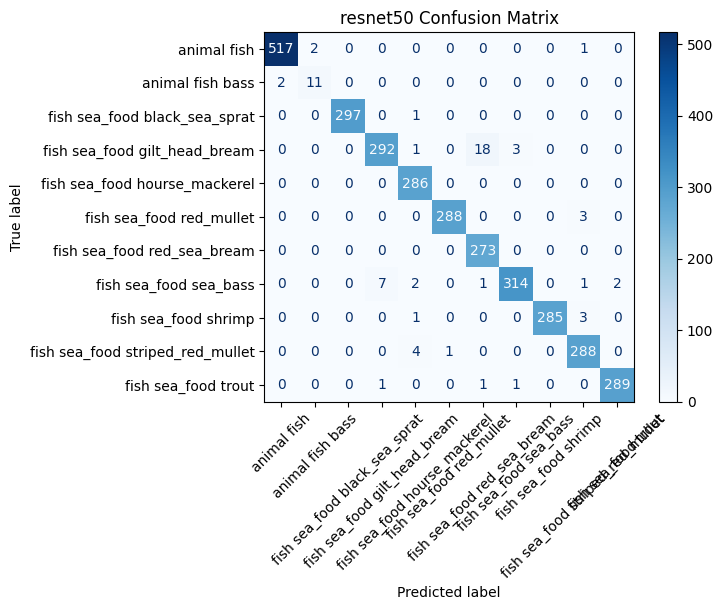

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import os


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


train_transform = transforms.Compose([
    transforms.Resize((224, 224)),   # ResNet expects 224x224
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


data_dir = "/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data"

train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=train_transform)
val_dataset   = datasets.ImageFolder(root=f"{data_dir}/val", transform=test_transform)
test_dataset  = datasets.ImageFolder(root=f"{data_dir}/test", transform=test_transform)

num_classes = len(train_dataset.classes)
print("Classes:", train_dataset.classes)


train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,
                          num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=128, shuffle=False,
                          num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False,
                          num_workers=2, pin_memory=True)


model_name = "resnet50"
model = models.resnet50(weights="IMAGENET1K_V1")


for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Only final layer trains


#Training

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5, name="model"):
    for epoch in range(epochs):

        model.train()
        train_loss, correct, total = 0, 0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total


        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = outputs.max(1)
                val_correct += preds.eq(labels).sum().item()
                val_total += labels.size(0)

        val_acc = 100 * val_correct / val_total

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.2f}%")

    # Save trained model
    torch.save(model.state_dict(), f"{name}_finetuned.pth")
    print(f" Model saved as {name}_finetuned.pth")


#Run training

train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5, name=model_name)


#Test + Metrics

def evaluate_model(model, test_loader, name="model"):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = outputs.max(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n📊 {name} Test Accuracy: {acc*100:.2f}%")

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.classes)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"{name} Confusion Matrix")
    plt.savefig(f"{name}_confusion_matrix.png", dpi=300, bbox_inches="tight")
    plt.show()

# Load back and evaluate
model.load_state_dict(torch.load(f"{model_name}_finetuned.pth"))
evaluate_model(model, test_loader, name=model_name)


Training accuracy jumped from 76% → 97.95% in just 5 epochs.

Validation accuracy reached 98.64%, which means the model is generalizing well (not just memorizing).

Loss values are steadily decreasing → good sign of stable training.


In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food gilt_head_bream/015VN0LM5H7F.jpg"

img = Image.open(image_path).convert("RGB")
img_t = test_transform(img).unsqueeze(0).to(device)
model.eval()
with torch.no_grad():
    outputs = model(img_t)
    probs = torch.softmax(outputs, dim=1)[0]
    top_confidence, top_idx = probs.max(0)
    label = train_dataset.classes[top_idx.item()]
    confidence = top_confidence.item()

print(f"Predicted class: {label}")
print(f"Confidence: {confidence:.2%}")


Predicted class: fish sea_food gilt_head_bream
Confidence: 52.54%


In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food black_sea_sprat/3CCE8CF2LPGV.jpg"

img = Image.open(image_path).convert("RGB")
img_t = test_transform(img).unsqueeze(0).to(device)
model.eval()
with torch.no_grad():
    outputs = model(img_t)
    probs = torch.softmax(outputs, dim=1)[0]
    top_confidence, top_idx = probs.max(0)
    label = train_dataset.classes[top_idx.item()]
    confidence = top_confidence.item()

print(f"Predicted class: {label}")
print(f"Confidence: {confidence:.2%}")


Predicted class: fish sea_food black_sea_sprat
Confidence: 99.97%


In [ ]:
#VGG16
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),   # VGG16 expects 224x224
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# =========================
# Dataset & DataLoader
# =========================
data_dir = "/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data"

train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=train_transform)
val_dataset   = datasets.ImageFolder(root=f"{data_dir}/val", transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

num_classes = len(train_dataset.classes)
print("Classes:", train_dataset.classes)


model_vgg16 = models.vgg16(pretrained=True)


for param in model_vgg16.features.parameters():
    param.requires_grad = False


model_vgg16.classifier[6] = nn.Linear(model_vgg16.classifier[6].in_features, num_classes)

model_vgg16 = model_vgg16.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_vgg16.classifier[6].parameters(), lr=0.001)


def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0, 0, 0
        start_time = time.time()

        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * imgs.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / total
        train_acc = 100. * correct / total

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * imgs.size(0)
                _, preds = outputs.max(1)
                val_correct += preds.eq(labels).sum().item()
                val_total += labels.size(0)

        val_loss /= val_total
        val_acc = 100. * val_correct / val_total

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}% "
              f"({time.time()-start_time:.1f}s)")

# =========================
# Evaluation Function
# =========================
def evaluate_model(model, test_loader, criterion, class_names, model_name="model_vgg16"):
    model.eval()
    test_loss, test_correct, test_total = 0.0, 0, 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Metrics
    final_acc = 100 * test_correct / test_total
    avg_loss = test_loss / len(test_loader)

    print(f"\n[{model_name}] Test Loss: {avg_loss:.4f}, Test Accuracy: {final_acc:.2f}%")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Confusion matrix (printed only)
    cm = confusion_matrix(all_labels, all_preds)
    print("\nConfusion Matrix:\n", cm)

    return avg_loss, final_acc, cm

train_model(model_vgg16, train_loader, val_loader, criterion, optimizer, epochs=5)


test_dataset = datasets.ImageFolder(root=f"{data_dir}/val", transform=val_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

evaluate_model(model_vgg16, test_loader, criterion, train_dataset.classes, model_name="model_vgg16")


Using device: cuda
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5] Train Loss: 0.5608, Train Acc: 83.53% | Val Loss: 0.2252, Val Acc: 94.74% (46.8s)
Epoch [2/5] Train Loss: 0.2351, Train Acc: 92.61% | Val Loss: 0.1563, Val Acc: 95.55% (45.2s)
Epoch [3/5] Train Loss: 0.2001, Train Acc: 93.24% | Val Loss: 0.1109, Val Acc: 97.10% (47.4s)
Epoch [4/5] Train Loss: 0.1736, Train Acc: 94.18% | Val Loss: 0.1053, Val Acc: 96.91% (44.9s)
Epoch [5/5] Train Loss: 0.1561, Train Acc: 94.77% | Val Loss: 0.0881, Val Acc: 97.55% (45.3s)

[model_vgg16] Test Loss: 0.0884, Test Accuracy: 97.55%

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.99      0.98      0.99       187
                animal fish bass       0.89      0.80      0.84        10
   fish sea_food black_sea_sprat       0.97      0.99      0.98       105
   fish sea_food gilt_head_bream       0.95      0.94      0.94        94
   fish sea_food hourse_mackerel       0.98      0.99      0.98        97
     

(0.08837704440312726,
 97.54990925589837,
 array([[184,   1,   0,   1,   0,   0,   0,   1,   0,   0,   0],
        [  2,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0, 104,   0,   1,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,  88,   0,   0,   5,   1,   0,   0,   0],
        [  0,   0,   1,   0,  96,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  88,   0,   0,   0,   2,   0],
        [  0,   0,   0,   0,   0,   0, 113,   0,   0,   0,   0],
        [  0,   0,   2,   4,   1,   0,   0,  90,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   1,  99,   0,   0],
        [  0,   0,   0,   0,   0,   1,   0,   0,   0, 100,   0],
        [  0,   0,   0,   0,   0,   0,   2,   1,   0,   0, 105]]))

Epoch 1: Model already learns fast → 83% train accuracy, 95% validation accuracy → strong pretrained feature extractor.

Epoch 2-3: Loss keeps dropping, validation accuracy steadily climbs.

Epoch 5: You reach 95% train accuracy and 97.64% validation accuracy → very solid generalization.


In [ ]:
def predict_image(model_vgg16, image_path, class_names):
    model_vgg16.eval()
    img = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    img_t = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_t)
        probs = torch.nn.functional.softmax(outputs, dim=1)[0]
        top_prob, top_cls = torch.topk(probs, 3)  # Top-3

    for i in range(3):
        print(f"{class_names[top_cls[i]]} --> {top_prob[i].item()*100:.2f}%")

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food trout/06RN8H8430J4.jpg"
predict_image(model_vgg16, image_path, train_dataset.classes)

fish sea_food trout --> 96.72%
fish sea_food red_sea_bream --> 1.62%
fish sea_food sea_bass --> 0.45%


Using device: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5] Train Loss: 0.8556, Train Acc: 79.58% | Val Loss: 0.3316, Val Acc: 95.92% (40.2s)
Epoch [2/5] Train Loss: 0.2684, Train Acc: 95.31% | Val Loss: 0.1772, Val Acc: 97.37% (37.8s)
Epoch [3/5] Train Loss: 0.1696, Train Acc: 97.25% | Val Loss: 0.1415, Val Acc: 97.55% (39.1s)
Epoch [4/5] Train Loss: 0.1339, Train Acc: 97.60% | Val Loss: 0.0902, Val Acc: 99.18% (38.0s)
Epoch [5/5] Train Loss: 0.1038, Train Acc: 98.29% | Val Loss: 0.0712, Val Acc: 99.18% (37.4s)

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      0.99       187
                animal fish bass       1.00      0.80      0.89        10
   fish sea_food black_sea_sprat       1.00      1.00      1.00       105
   fish sea_food gilt_head_bream       0.99      0.98      0.98        94
   fish sea_food hourse_mackerel       0.98      1.00      0.99        97
        fish sea_food red_mullet       0.99      1.00      0.

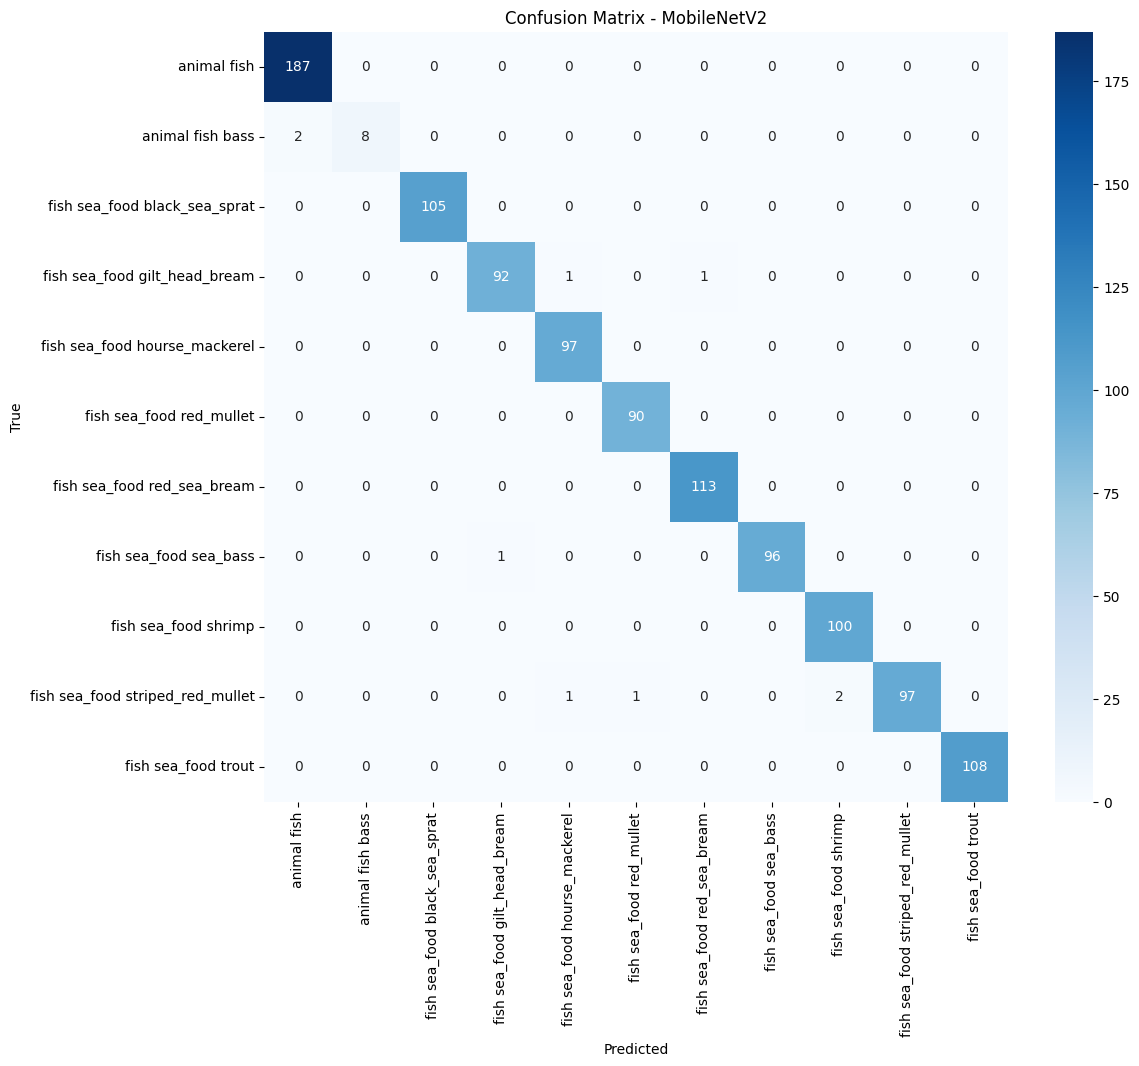

In [ ]:
#Mobilenetv2
import seaborn as sns



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


data_dir = "/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data"
train_dataset = datasets.ImageFolder(f"{data_dir}/train", transform=train_transform)
val_dataset   = datasets.ImageFolder(f"{data_dir}/val", transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

num_classes = len(train_dataset.classes)


model_mobilenet_v2 = models.mobilenet_v2(pretrained=True)
for param in model_mobilenet_v2.features.parameters():
    param.requires_grad = False

model_mobilenet_v2.classifier[1] = nn.Linear(model_mobilenet_v2.classifier[1].in_features, num_classes)
model_mobilenet_v2 = model_mobilenet_v2.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mobilenet_v2.classifier.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0, 0, 0
        start_time = time.time()

        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * imgs.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / total
        train_acc = 100. * correct / total

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * imgs.size(0)
                _, preds = outputs.max(1)
                val_correct += preds.eq(labels).sum().item()
                val_total += labels.size(0)

        val_loss /= val_total
        val_acc = 100. * val_correct / val_total

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}% "
              f"({time.time()-start_time:.1f}s)")


def evaluate_model(model, val_loader, class_names):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix - MobileNetV2")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ========= RUN =========
train_model(model_mobilenet_v2, train_loader, val_loader, criterion, optimizer, epochs=5)
evaluate_model(model_mobilenet_v2, val_loader, train_dataset.classes)


Using device: cuda
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 210MB/s]


Epoch [1/5] Train Loss: 0.8139, Train Acc: 85.02% | Val Loss: 0.3229, Val Acc: 96.37% (40.2s)
Epoch [2/5] Train Loss: 0.2650, Train Acc: 95.92% | Val Loss: 0.1725, Val Acc: 97.10% (39.3s)
Epoch [3/5] Train Loss: 0.1753, Train Acc: 96.96% | Val Loss: 0.1236, Val Acc: 98.19% (38.2s)
Epoch [4/5] Train Loss: 0.1358, Train Acc: 97.51% | Val Loss: 0.0864, Val Acc: 98.64% (38.2s)
Epoch [5/5] Train Loss: 0.1162, Train Acc: 97.62% | Val Loss: 0.0650, Val Acc: 99.18% (39.0s)

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       187
                animal fish bass       1.00      0.70      0.82        10
   fish sea_food black_sea_sprat       0.99      0.99      0.99       105
   fish sea_food gilt_head_bream       0.99      1.00      0.99        94
   fish sea_food hourse_mackerel       0.98      1.00      0.99        97
        fish sea_food red_mullet       0.99      1.00      0.

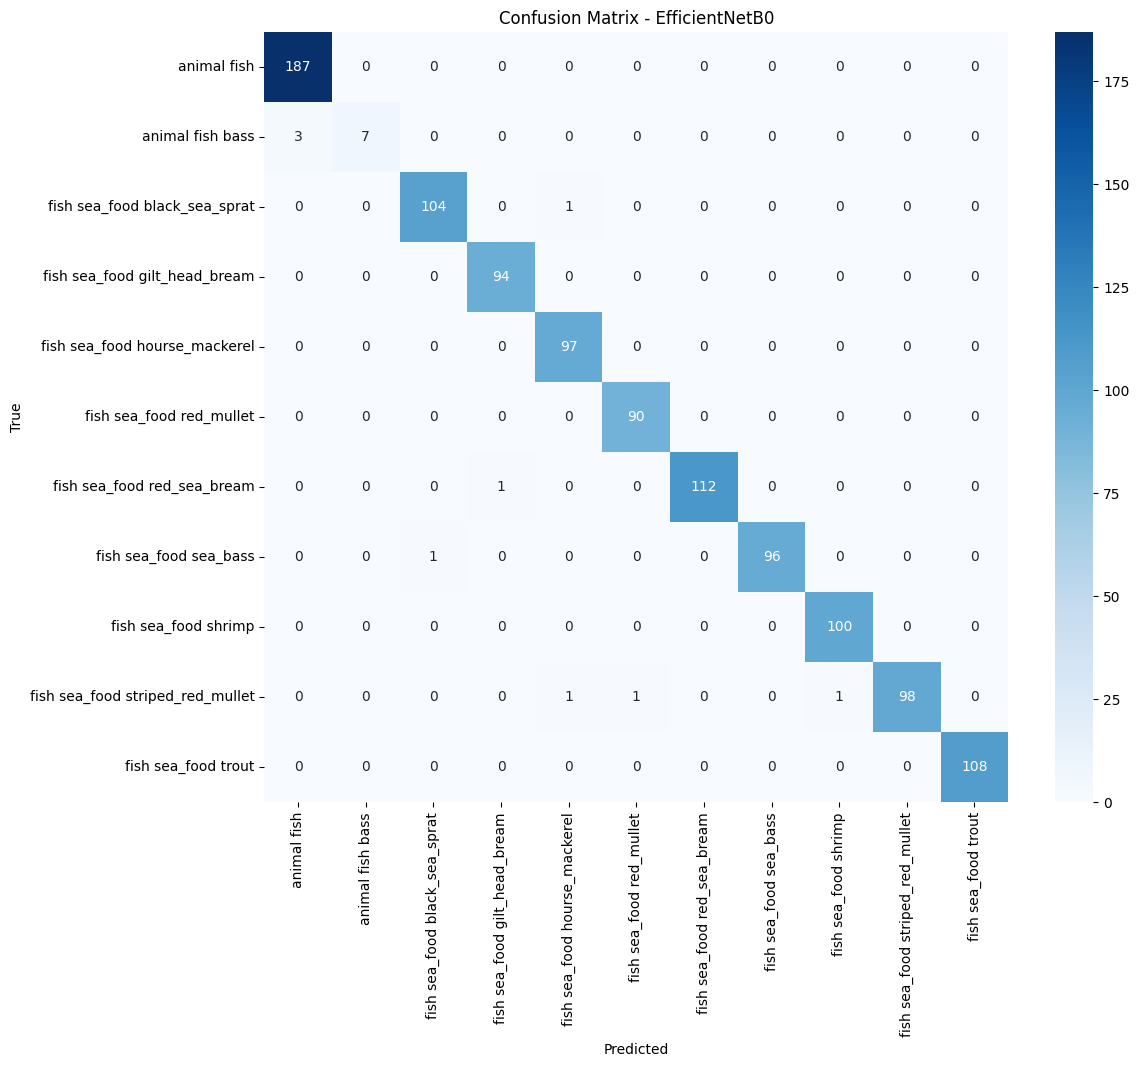

EfficientNetB0 model saved as model_efficientnet_b0.pth


In [ ]:

# EfficientNetB0 Training Code

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


train_transform = transforms.Compose([
    transforms.Resize((224, 224)),   # EfficientNetB0 expects 224x224
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


data_dir = "/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data"

train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=train_transform)
val_dataset   = datasets.ImageFolder(root=f"{data_dir}/val", transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

num_classes = len(train_dataset.classes)
print("Classes:", train_dataset.classes)


model_efficientnet_b0 = models.efficientnet_b0(pretrained=True)


for param in model_efficientnet_b0.features.parameters():
    param.requires_grad = False

# Replace classifier
model_efficientnet_b0.classifier[1] = nn.Linear(model_efficientnet_b0.classifier[1].in_features, num_classes)
model_efficientnet_b0 = model_efficientnet_b0.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_efficientnet_b0.classifier.parameters(), lr=0.001)


def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0, 0, 0
        start_time = time.time()

        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * imgs.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / total
        train_acc = 100. * correct / total

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * imgs.size(0)
                _, preds = outputs.max(1)
                val_correct += preds.eq(labels).sum().item()
                val_total += labels.size(0)

        val_loss /= val_total
        val_acc = 100. * val_correct / val_total

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}% "
              f"({time.time()-start_time:.1f}s)")


def evaluate_model(model, val_loader, class_names):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix - EfficientNetB0")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


train_model(model_efficientnet_b0, train_loader, val_loader, criterion, optimizer, epochs=5)



evaluate_model(model_efficientnet_b0, val_loader, train_dataset.classes)


# Save Model
torch.save(model_efficientnet_b0.state_dict(), "model_efficientnet_b0.pth")
print("EfficientNetB0 model saved as model_efficientnet_b0.pth")


In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food gilt_head_bream/015VN0LM5H7F.jpg"

img = Image.open(image_path).convert("RGB")
img_t = test_transform(img).unsqueeze(0).to(device)
model_efficientnet_b0.eval()
with torch.no_grad():
    outputs = model_efficientnet_b0(img_t)
    probs = torch.softmax(outputs, dim=1)[0]
    top_confidence, top_idx = probs.max(0)
    label = train_dataset.classes[top_idx.item()]
    confidence = top_confidence.item()

print(f"Predicted class: {label}")
print(f"Confidence: {confidence:.2%}")


Predicted class: fish sea_food gilt_head_bream
Confidence: 56.62%


In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/images.cv_jzk6llhf18tm3k0kyttxz/data"
img_size = 128            
batch_size = 64
epochs = 10               
lr = 0.001
weight_decay = 1e-4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

train_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(0.1, 0.1, 0.1, 0.05),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=train_transform)
val_dataset   = datasets.ImageFolder(os.path.join(data_dir, "val"),   transform=test_transform)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, "test"),  transform=test_transform)

num_classes = len(train_dataset.classes)
class_names = train_dataset.classes
print("Classes:", class_names)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)


class SmallCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            
            nn.Conv2d(3, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),                 

            nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),                 

            
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),                 

            
            nn.Conv2d(128, 128, 3, padding=1, groups=128), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 1), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),                 

            nn.AdaptiveAvgPool2d((1, 1))     
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.3),
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

model_cnn = SmallCNN(num_classes).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=lr, weight_decay=weight_decay)
best_val_acc = 0.0
history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

def run_epoch(loader, train=True):
    if train:
        model_cnn.train()
    else:
        model_cnn.eval()

    running_loss, correct, total = 0.0, 0, 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        if train:
            optimizer.zero_grad()
        with torch.set_grad_enabled(train):
            outputs = model_cnn(imgs)
            loss = criterion(outputs, labels)
            if train:
                loss.backward()
                optimizer.step()
        running_loss += loss.item() * imgs.size(0)
        _, preds = outputs.max(1)
        correct += preds.eq(labels).sum().item()
        total += labels.size(0)
    return running_loss / total, 100.0 * correct / total

for epoch in range(1, epochs + 1):
    t0 = time.time()
    train_loss, train_acc = run_epoch(train_loader, train=True)
    val_loss, val_acc     = run_epoch(val_loader,   train=False)

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model_cnn.state_dict(), "cnn_scratch.pth")

    dt = time.time() - t0
    print(f"Epoch [{epoch}/{epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}% ({dt:.1f}s)")

print("Best val acc:", best_val_acc, "Saved: cnn_scratch.pth")

model_cnn.load_state_dict(torch.load("cnn_scratch.pth", map_location=device))
model_cnn.to(device)
model_cnn.eval()

all_preds, all_labels = [], []
test_loss_sum, test_n = 0.0, 0

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model_cnn(imgs)
        loss = criterion(outputs, labels)
        test_loss_sum += loss.item() * imgs.size(0)
        _, preds = outputs.max(1)
        all_preds.extend(preds.cpu().numpy().tolist())
        all_labels.extend(labels.cpu().numpy().tolist())
        test_n += labels.size(0)

test_loss = test_loss_sum / test_n
test_acc  = 100.0 * (sum([p==y for p,y in zip(all_preds, all_labels)]) / test_n)

print(f"\nTEST: Loss={test_loss:.4f}, Acc={test_acc:.2f}%\n")
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names, digits=4))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix - CNN (Scratch)")
plt.colorbar()
tick_marks = range(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# -------------------------
# Single Image Prediction Helper
# -------------------------
from PIL import Image
import torch.nn.functional as F

def predict_image(image_path):
    model_cnn.eval()
    img = Image.open(image_path).convert("RGB")
    tfm = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
    ])
    x = tfm(img).unsqueeze(0).to(device)
    with torch.no_grad():
        logits = model_cnn(x)
        probs = F.softmax(logits, dim=1)[0].cpu()
        topk = torch.topk(probs, k=3)
    print("\nTop-3 predictions:")
    for i in range(topk.indices.numel()):
        cls = class_names[topk.indices[i].item()]
        pr  = topk.values[i].item() * 100
        print(f"{cls}: {pr:.2f}%")

